In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read csv file 
data = pd.read_csv('income_dataset.csv')

In [3]:
# view first 5 records
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
data.dtypes

age           int64
experience    int64
income        int64
dtype: object

# Data Preprocessing

In [5]:
# check null values
chk_null = data.isnull().values.any()
chk_null

False

# Train and Test

In [6]:
# last column is target variable and rest are features
X = data.iloc[:, :-1].values  # all columns except last one
y = data.iloc[:, -1].values   # last column

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# make predictions 
y_pred = model.predict(X_test)

# Evaluations

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 753796.7693734544
R^2 Score: 0.9387098237077887


In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Residuals Plot')

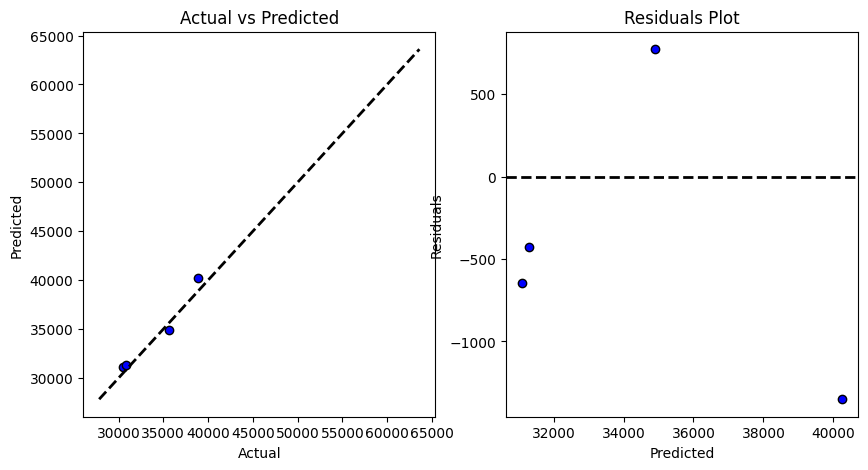

In [13]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))

# Plotting the Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Plotting the residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Save Model

In [14]:
import joblib

In [15]:
# save model
joblib.dump(model, 'linear_regression_multiple_model.pkl')

['linear_regression_multiple_model.pkl']

# New Predictions

In [16]:
import numpy as np

In [17]:
# load model 
loaded_model = joblib.load('linear_regression_multiple_model.pkl')

# Example new data
new_data = np.array([[25,3],
                     [30,5]]) 

# loaded model to make predictions on new data
new_predictions = loaded_model.predict(new_data)
print("Predictions for new data:", new_predictions)

Predictions for new data: [35402.99205931 39207.30687735]
